In [1]:
import pandas as pd

In [14]:
from matplotlib import pyplot as plt 

In [2]:
film_permits = pd.read_csv("Film_Permits.csv")

In [69]:
print(film_permits.columns)

Index(['EventID', 'EventType', 'StartDateTime', 'EndDateTime', 'EnteredOn',
       'EventAgency', 'ParkingHeld', 'Borough', 'CommunityBoard(s)',
       'PolicePrecinct(s)', 'Category', 'SubCategoryName', 'Country',
       'ZipCode(s)', 'StartDateYear'],
      dtype='object')


In [3]:
print(film_permits.head())

   EventID                      EventType           StartDateTime  \
0   446040                Shooting Permit  10/19/2018 02:00:00 PM   
1   446168                Shooting Permit  10/19/2018 02:00:00 PM   
2   186438                Shooting Permit  10/30/2014 07:00:00 AM   
3   445255                Shooting Permit  10/20/2018 07:00:00 AM   
4   128794  Theater Load in and Load Outs  11/16/2013 12:01:00 AM   

              EndDateTime               EnteredOn  \
0  10/20/2018 04:00:00 AM  10/16/2018 11:57:27 AM   
1  10/20/2018 02:00:00 AM  10/16/2018 07:03:56 PM   
2  10/31/2014 02:00:00 AM  10/27/2014 12:14:15 PM   
3  10/20/2018 06:00:00 PM  10/09/2018 09:34:58 PM   
4  11/17/2013 06:00:00 AM  11/07/2013 03:48:28 PM   

                                      EventAgency  \
0  Mayor's Office of Film, Theatre & Broadcasting   
1  Mayor's Office of Film, Theatre & Broadcasting   
2  Mayor's Office of Film, Theatre & Broadcasting   
3  Mayor's Office of Film, Theatre & Broadcasting   
4

In [4]:
print(film_permits["Borough"].unique())

['Manhattan' 'Queens' 'Brooklyn' 'Bronx' 'Staten Island']


In [5]:
print(film_permits["SubCategoryName"].unique())

['Cable-episodic' 'Feature' 'Episodic series' 'Not Applicable' 'Theater'
 'News' 'Promo' 'Variety' 'Pilot' 'Commercial' 'Short' 'Reality'
 'Morning Show' 'Student Film' 'Made for TV/mini-series' 'Magazine Show'
 'Industrial/Corporate' 'Talk Show' 'Cable-daily' 'Syndication/First Run'
 'PSA' 'Special/Awards Show' 'Cable-other' 'Independent Artist'
 'Signed Artist' 'Game show' 'Children' 'Daytime soap' 'TV Premiere'
 'Trailers']


In [9]:
print(film_permits["Borough"].value_counts())

Manhattan        33436
Brooklyn         21281
Queens           11073
Bronx             2149
Staten Island      920
Name: Borough, dtype: int64


In [13]:
print(film_permits["ZipCode(s)"].value_counts().head(10))

11222    6702
11101    4252
10036    2523
10019    2406
10023    1669
11201    1471
11217    1442
10001    1397
10011    1246
10013    1193
Name: ZipCode(s), dtype: int64


In [16]:
print(film_permits["Borough"].value_counts(normalize=True))

Manhattan        0.485572
Brooklyn         0.309052
Queens           0.160807
Bronx            0.031209
Staten Island    0.013361
Name: Borough, dtype: float64


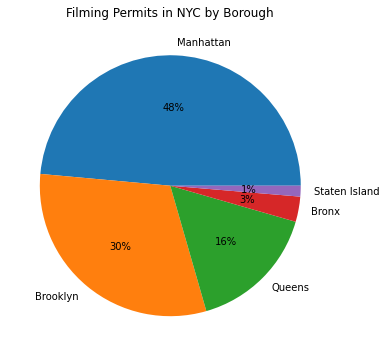

In [25]:
plt.figure(figsize = (6, 6))
plt.title("Filming Permits in NYC by Borough")
plt.pie(film_permits["Borough"].value_counts(normalize=True),
        labels = film_permits["Borough"].value_counts(normalize=True).index,
       autopct = "%d%%")
plt.show()

In [26]:
print(film_permits.dtypes)

EventID               int64
EventType            object
StartDateTime        object
EndDateTime          object
EnteredOn            object
EventAgency          object
ParkingHeld          object
Borough              object
CommunityBoard(s)    object
PolicePrecinct(s)    object
Category             object
SubCategoryName      object
Country              object
ZipCode(s)           object
dtype: object


In [29]:
film_permits["StartDateYear"] = film_permits["StartDateTime"].str[6:11]

In [30]:
print(film_permits.head())

   EventID                      EventType           StartDateTime  \
0   446040                Shooting Permit  10/19/2018 02:00:00 PM   
1   446168                Shooting Permit  10/19/2018 02:00:00 PM   
2   186438                Shooting Permit  10/30/2014 07:00:00 AM   
3   445255                Shooting Permit  10/20/2018 07:00:00 AM   
4   128794  Theater Load in and Load Outs  11/16/2013 12:01:00 AM   

              EndDateTime               EnteredOn  \
0  10/20/2018 04:00:00 AM  10/16/2018 11:57:27 AM   
1  10/20/2018 02:00:00 AM  10/16/2018 07:03:56 PM   
2  10/31/2014 02:00:00 AM  10/27/2014 12:14:15 PM   
3  10/20/2018 06:00:00 PM  10/09/2018 09:34:58 PM   
4  11/17/2013 06:00:00 AM  11/07/2013 03:48:28 PM   

                                      EventAgency  \
0  Mayor's Office of Film, Theatre & Broadcasting   
1  Mayor's Office of Film, Theatre & Broadcasting   
2  Mayor's Office of Film, Theatre & Broadcasting   
3  Mayor's Office of Film, Theatre & Broadcasting   
4

In [33]:
print(film_permits.groupby(["StartDateYear"]).EventID.count())

StartDateYear
2012     6910
2013     8094
2014     7962
2015     8958
2016     8095
2017     8222
2018     9010
2019     8441
2020     2559
2021      608
Name: EventID, dtype: int64


In [35]:
print(film_permits.groupby(["StartDateYear"]).EventID.count().values)

[6910 8094 7962 8958 8095 8222 9010 8441 2559  608]


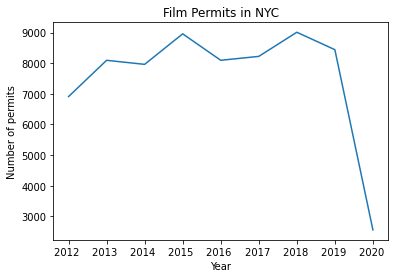

In [40]:
plt.title("Film Permits in NYC")
plt.plot(film_permits.groupby(["StartDateYear"]).EventID.count().index[:-1],
         film_permits.groupby(["StartDateYear"]).EventID.count().values[:-1])
plt.ylabel("Number of permits")
plt.xlabel("Year")
plt.show()

In [53]:
print(film_permits["Borough"].unique())

['Manhattan' 'Queens' 'Brooklyn' 'Bronx' 'Staten Island']


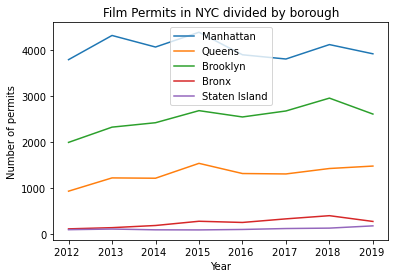

In [84]:
plt.title("Film Permits in NYC divided by borough")
for borough in film_permits["Borough"].unique():
    plt.plot(
        film_permits[film_permits["Borough"] == borough].groupby(["StartDateYear"]).EventID.count().index[:-2],
        film_permits[film_permits["Borough"] == borough].groupby(["StartDateYear"]).EventID.count().values[:-2]
    )
plt.ylabel("Number of permits")
plt.xlabel("Year")
plt.legend(film_permits["Borough"].unique())
plt.show()

In [85]:
def plot_subcategory_by_borough(subcategory):
    for borough in film_permits["Borough"].unique():
        cat_bor = film_permits[
            (film_permits.Borough == borough) & (film_permits.SubCategoryName == subcategory)
        ].groupby(["StartDateYear"]).EventID.count()
        plt.plot(
            cat_bor.index[:-2],
            cat_bor.values[:-2]
        )
    plt.title(str(subcategory) + " permits in NYC by borough")
    plt.ylabel("Number of permits")
    plt.xlabel("Year")
    plt.legend(film_permits["Borough"].unique())
    plt.show()

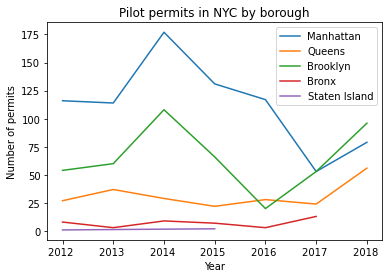

In [86]:
plot_subcategory_by_borough("Pilot")

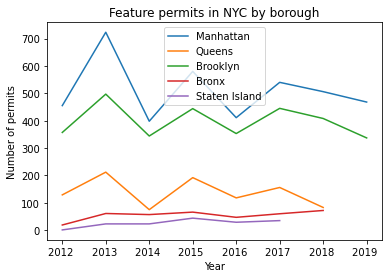

In [87]:
plot_subcategory_by_borough("Feature")

In [88]:
def plot_category_by_borough(category):
    for borough in film_permits["Borough"].unique():
        cat_bor = film_permits[
            (film_permits.Borough == borough) & (film_permits.Category == category)
        ].groupby(["StartDateYear"]).EventID.count()
        plt.plot(
            cat_bor.index[:-2],
            cat_bor.values[:-2]
        )
    plt.title(str(category) + " permits in NYC by borough")
    plt.ylabel("Number of permits")
    plt.xlabel("Year")
    plt.legend(film_permits["Borough"].unique())
    plt.show()

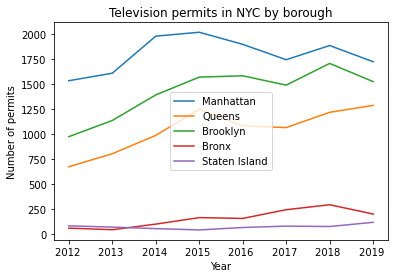

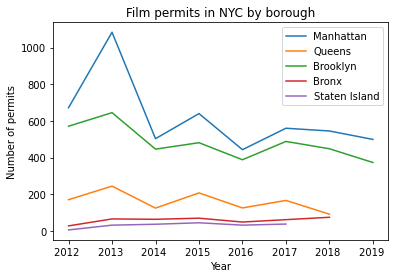

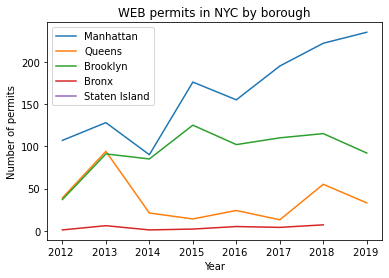

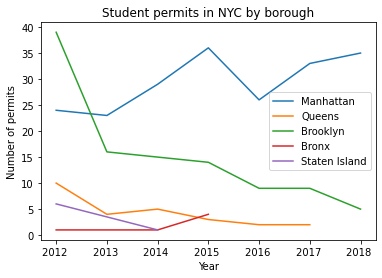

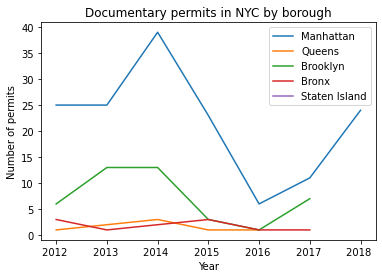

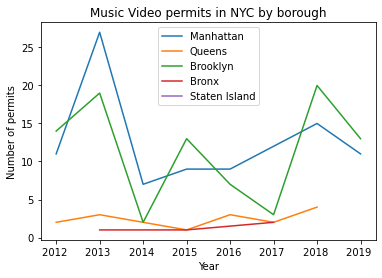

In [92]:
for category in ["Television", "Film", "WEB", "Student", "Documentary", "Music Video"]:
    plot_category_by_borough(category)

Television             0.555396
Film                   0.158832
Theater                0.098273
Commercial             0.078610
Still Photography      0.058932
WEB                    0.036233
Student                0.006201
Documentary            0.004110
Music Video            0.003398
Red Carpet/Premiere    0.000015
Name: Category, dtype: float64


<ipython-input-111-f18dc02f12ad>:4: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  plt.pie(film_permits["Category"].value_counts(normalize=True))


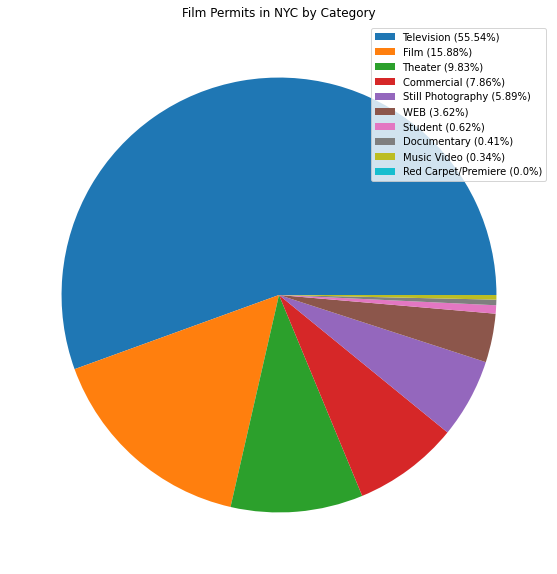

In [111]:
category_percs = film_permits["Category"].value_counts(normalize=True)
print(category_percs)
plt.figure(figsize=(10, 10))
plt.pie(film_permits["Category"].value_counts(normalize=True))
plt.title("Film Permits in NYC by Category")
plt.legend([
    category_percs.index[i] + " (" + str(round(category_percs.values[i] * 100, 2)) + "%)" for i in range(len(category_percs))])
plt.show()

Episodic series            0.324518
Feature                    0.133156
Not Applicable             0.126723
Cable-episodic             0.110385
Theater                    0.098273
Commercial                 0.063245
Pilot                      0.024630
News                       0.022205
Cable-other                0.011110
Short                      0.010659
Made for TV/mini-series    0.010543
Reality                    0.009469
Morning Show               0.008902
Promo                      0.008786
Special/Awards Show        0.006259
Variety                    0.005112
Talk Show                  0.004880
Industrial/Corporate       0.004589
Student Film               0.004429
Cable-daily                0.003297
Signed Artist              0.002440
PSA                        0.001917
Game show                  0.001496
Children                   0.001176
Syndication/First Run      0.000639
Independent Artist         0.000566
Daytime soap               0.000290
Magazine Show              0

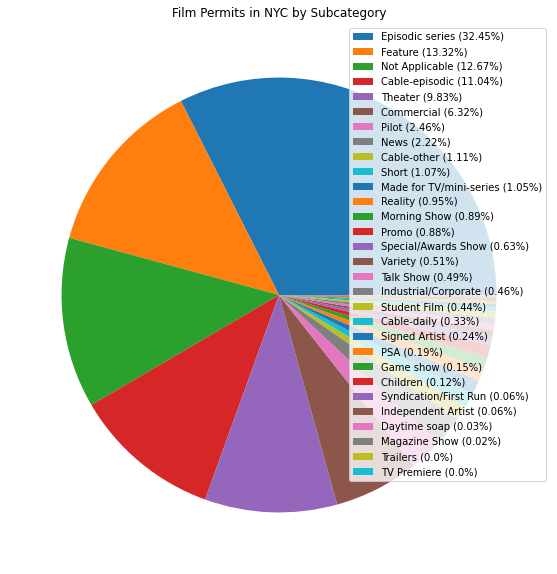

In [114]:
subcategory_percs = film_permits["SubCategoryName"].value_counts(normalize=True)
print(subcategory_percs)
plt.figure(figsize=(10, 10))
plt.pie(subcategory_percs)
plt.title("Film Permits in NYC by Subcategory")
plt.legend([
    subcategory_percs.index[i] + " (" + str(round(subcategory_percs.values[i] * 100, 2)) + "%)" \
    for i in range(len(subcategory_percs))], loc = "upper right")
plt.show()

In [118]:
print(film_permits[film_permits.SubCategoryName == "Pilot"]["Borough"].value_counts())

Manhattan        849
Brooklyn         516
Queens           254
Bronx             67
Staten Island     10
Name: Borough, dtype: int64
